In [15]:
%matplotlib inline
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt

from tools import flare_model_v2

In [16]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [119]:
def find_times(time,t,w,h,ypt, fwd=False):
    ftmp = flare_model_v2(time,t,w,h)
    if fwd:
        side = np.where((time >= time[np.argmax(ftmp)]))[0]
    else:
        side = np.where((time < time[np.argmax(ftmp)]))[0]
        
    xpt = np.argmin(np.abs(ftmp[side]-ypt))
    
    output = t-time[side[xpt]]
    return output

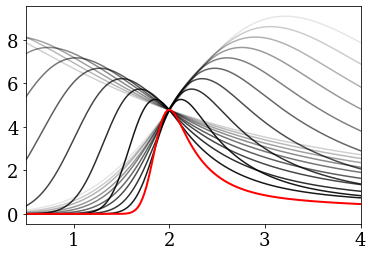

In [137]:
time = np.arange(0,10,0.01)

fmodel=flare_model_v2(time,2,0.5,5)
ypt = max(fmodel)
xpt = time[np.argmax(fmodel)]

for k in range(1,10):
    width = 0.5 + k/3
    ampl = 5+k/2
    plt.plot(time, flare_model_v2(time, 2+find_times(time,2, width,ampl, ypt,fwd=False), 
                                  width,ampl), c='k', alpha=1-k/10 )
    plt.plot(time, flare_model_v2(time, 2+find_times(time,2, width,ampl, ypt,fwd=True), 
                                  width,ampl), c='k', alpha=1-k/11 )

plt.plot(time + (2-xpt), fmodel, lw=2, c='r')


plt.xlim(.5,4)
plt.savefig('flare_butterfly.png', dpi=150, bbox_inches='tight', pad_inches=0.25, facecolor='w')

In [ ]:
# having 1 flare is only a little useful, but only 